# Part of Speech Tagging

# Install NLTK POS Tagger 

In [5]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize


ModuleNotFoundError: No module named 'nltk'

## Test

In [2]:
text = "The dog eats the big hotdog."
tokens = word_tokenize(text)
print(nltk.pos_tag(tokens))


[('The', 'DT'), ('dog', 'NN'), ('eats', 'VBZ'), ('the', 'DT'), ('big', 'JJ'), ('hotdog', 'NN'), ('.', '.')]


In [3]:
print(nltk.pos_tag(word_tokenize("The book is written by my father.")))

[('The', 'DT'), ('book', 'NN'), ('is', 'VBZ'), ('written', 'VBN'), ('by', 'IN'), ('my', 'PRP$'), ('father', 'NN'), ('.', '.')]


In [4]:
print(nltk.pos_tag(word_tokenize("My father has written more than ten books.")))

[('My', 'PRP$'), ('father', 'NN'), ('has', 'VBZ'), ('written', 'VBN'), ('more', 'JJR'), ('than', 'IN'), ('ten', 'JJ'), ('books', 'NNS'), ('.', '.')]


## Full list of the Penn POS tags

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
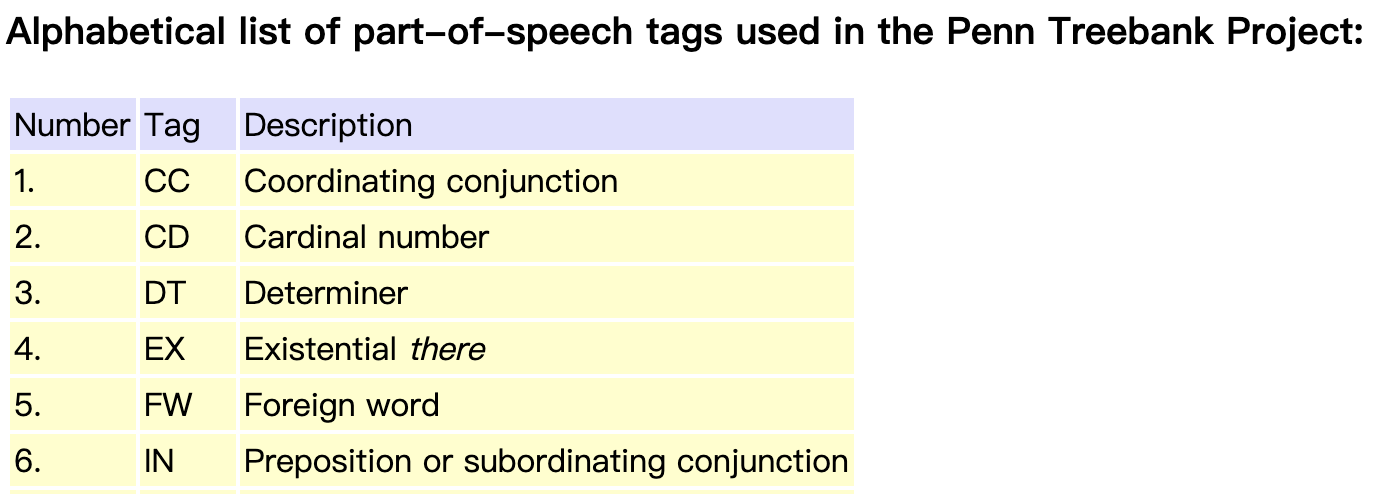

# Perform POS tagging for all tokens in the corpus. 

In [3]:
with open("data/corpus01.txt", encoding="utf8") as fin:
    text = fin.read()
print("Number of characters: %d" % len(text))

Number of characters: 29364


In [4]:
tokens = word_tokenize(text)
tokens_with_tag = nltk.pos_tag(tokens)

NameError: name 'word_tokenize' is not defined

## Find the most frequent nouns

In [7]:
from collections import Counter

noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NN':
        noun_counts[word] += 1

for k, v in noun_counts.most_common(20):
    print(k, '\t', v)

bourgeoisie 	 51
class 	 35
society 	 32
bourgeois 	 25
production 	 25
proletariat 	 25
industry 	 22
development 	 14
labor 	 13
existence 	 13
property 	 10
history 	 9
struggle 	 8
place 	 8
machinery 	 8
proportion 	 8
competition 	 8
exchange 	 7
capital 	 7
man 	 7


## Now we can always convert words into lower case, excepting proper nouns.

In [8]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NN':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('bourgeoisie', 51), ('class', 35), ('society', 33), ('bourgeois', 25), ('production', 25), ('proletariat', 25), ('industry', 22), ('development', 14), ('labor', 13), ('existence', 13), ('property', 10), ('history', 9), ('struggle', 8), ('place', 8), ('machinery', 8), ('proportion', 8), ('competition', 8), ('exchange', 7), ('capital', 7), ('man', 7)]


Explore other kinds of part of speech tags

In [9]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'VB':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('be', 9), ('thus', 3), ('become', 2), ('have', 2), ('form', 2), ('attain', 2), ('fortify', 2), ('slave', 1), ('commerce', 1), ('pass', 1), ('show', 1), ('bring', 1), ('exist', 1), ('distinguish', 1), ('ossify', 1), ('face', 1), ('nestle', 1), ('settle', 1), ('establish', 1), ('work', 1)]


In [10]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NNP' or tag == 'NNPS':
        noun_counts[word] += 1
        
print(noun_counts.most_common(20))

[('America', 4), ('France', 4), ('Modern', 3), ('State', 3), ('England', 3), ('Society', 2), ('East', 2), ('Industry', 2), ('Germany', 2), ('_i.e._', 2), ('Nay', 2), ('BOURGEOIS', 1), ('PROLETARIANS', 1), ('Freeman', 1), ('Rome', 1), ('Bourgeoisie', 1), ('Proletariat', 1), ('Cape', 1), ('Thereupon', 1), ('Italy', 1)]


In [11]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'V':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('is', 56), ('has', 46), ('are', 32), ('have', 14), ('was', 11), ('be', 9), ('become', 6), ('becomes', 6), ('were', 5), ('developed', 5), ('created', 5), ('existing', 4), ('carried', 4), ('find', 4), ('put', 4), ('set', 4), ('been', 4), ('destroyed', 4), ('being', 4), ('had', 4)]


# With lemmatization for better handle different forms of verbs.

- GOAL - 在計算出現次數前，先用`lemmatize()`將動詞或名詞恢復成原型
- METHOD - Load WordNet Lemmatizer provided by NTLK
- EXAMPLE
    - 'is', 'are', 'were' -> 'be' 
    - 'has', 'have' -> 'have'


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [13]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'V':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'v')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('be', 121), ('have', 65), ('become', 15), ('find', 9), ('develop', 8), ('do', 6), ('take', 6), ('compel', 6), ('destroy', 6), ('create', 6), ('exist', 5), ('see', 5), ('make', 5), ('go', 5), ('carry', 4), ('rise', 4), ('give', 4), ('increase', 4), ('put', 4), ('set', 4)]


In [14]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'N':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'n')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('bourgeoisie', 52), ('class', 49), ('society', 35), ('industry', 28), ('bourgeois', 27), ('proletariat', 26), ('production', 26), ('condition', 21), ('mean', 14), ('development', 14), ('labor', 13), ('relation', 13), ('existence', 13), ('struggle', 10), ('market', 10), ('laborer', 10), ('country', 10), ('property', 10), ('force', 10), ('history', 9)]


In [15]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'R':
        noun_counts[word.lower()] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('more', 21), ('not', 20), ('up', 13), ('so', 12), ('only', 10), ('longer', 8), ('therefore', 8), ('no', 7), ('also', 7), ('now', 6), ('everywhere', 6), ('ever', 6), ('most', 6), ('too', 6), ('here', 5), ('then', 5), ('already', 5), ('away', 4), ('just', 4), ('almost', 3)]


In [16]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'R':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'r')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('more', 21), ('not', 20), ('up', 13), ('so', 12), ('only', 10), ('longer', 8), ('therefore', 8), ('no', 7), ('also', 7), ('now', 6), ('everywhere', 6), ('ever', 6), ('most', 6), ('too', 6), ('here', 5), ('far', 5), ('then', 5), ('already', 5), ('away', 4), ('just', 4)]


# Mining Specific Distant Collocations

Back to last week

In [17]:
window_size = 9

word_pair_counts = Counter()
word_pair_distance_counts = Counter()
for i in range(len(tokens) - 1):
    for distance in range(1, window_size):
        if i + distance < len(tokens):
            w1 = tokens[i]
            w2 = tokens[i + distance]
            word_pair_distance_counts[(w1, w2, distance)] += 1
            word_pair_counts[(w1, w2)] += 1

for (w1, w2, distance), c in word_pair_distance_counts.most_common(20):
    print("%s\t%s\t%d\t%d" % (w1, w2, distance, c))

the	of	2	103
of	the	1	93
the	the	3	64
.	The	1	51
,	the	1	50
,	,	4	48
the	,	2	48
of	,	2	47
,	,	8	46
,	,	5	46
,	,	6	46
,	and	1	44
the	,	5	43
,	the	4	42
,	the	8	40
,	,	2	40
,	the	5	40
,	the	6	39
the	the	7	39
,	the	2	39


## Detect all verb-noun collocations

In [1]:
window_size = 9

word_pair_counts = Counter()
word_pair_distance_counts = Counter()
for i in range(len(tokens_with_tag) - 1):
    w1, t1 = tokens_with_tag[i]
    if t1[0] != 'V':
        continue
    w1 = wordnet_lemmatizer.lemmatize(w1.lower(), 'v')
        
    for distance in range(1, window_size):
        if i + distance < len(tokens_with_tag):
            w2, t2 = tokens_with_tag[i + distance]
            if t2[0] == 'N':
                w2 = wordnet_lemmatizer.lemmatize(w2.lower(), 'n')
                word_pair_distance_counts[(w1, w2, distance)] += 1
                word_pair_counts[(w1, w2)] += 1

for (w1, w2, distance), c in word_pair_distance_counts.most_common(20):
    print("%s\t%s\t%d\t%d" % (w1, w2, distance, c))

NameError: name 'Counter' is not defined

## Compute the mean distance of each verb-noun pair.

In [19]:
pair_mean_distances = Counter()

for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])


## Show the longest, middle, and shortest pairs. 

### longest part

In [20]:
### longest part
for (w1, w2), distance in pair_mean_distances.most_common(20):
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

have	force	7.500000	2
have	master	7.500000	2
have	man	7.000000	2
have	industry	7.000000	2
be	modern	7.000000	2
leave	man	7.000000	2
be	capitalist	7.000000	2
have	condition	6.500000	2
give	navigation	6.500000	2
push	class	6.500000	2
have	market	6.500000	2
be	mean	6.500000	2
be	proportion	6.500000	2
seek	status	6.500000	2
be	time	6.500000	2
have	society	6.333333	3
be	competition	6.200000	5
be	bourgeoisie	6.142857	7
have	feudal	6.000000	2
be	existence	6.000000	3


### Middle part

In [21]:
### Middle part
num_pairs = len(pair_mean_distances)
mid = num_pairs // 2
for (w1, w2), distance in pair_mean_distances.most_common()[mid-20:mid+20]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

be	existence	6.000000	3
be	crisis	6.000000	2
remain	man	6.000000	2
work	material	6.000000	2
develop	laborer	6.000000	2
have	character	6.000000	2
do	enemy	6.000000	2
be	view	6.000000	2
be	form	6.000000	3
have	production	6.000000	3
be	industry	5.800000	5
be	class	5.545455	11
exist	history	5.500000	2
reduce	relation	5.500000	2
have	antagonism	5.333333	3
be	man	5.333333	3
be	condition	5.333333	3
be	proletariat	5.333333	3
be	struggle	5.000000	4
have	part	5.000000	2
be	bourgeois	5.000000	2
be	laborer	5.000000	2
compel	proletariat	5.000000	2
be	guild	5.000000	2
be	advance	5.000000	2
have	bourgeoisie	5.000000	2
have	hand	5.000000	2
have	population	5.000000	3
have	dependent	5.000000	2
be	slave	5.000000	2
be	society	4.800000	5
have	mean	4.750000	4
have	world	4.500000	2
create	force	4.500000	2
join	class	4.500000	2
be	air	4.000000	2
be	weapon	4.000000	2
have	class	4.000000	3
be	product	4.000000	2
have	family	4.000000	2


### shortest part

In [22]:
### Shortest part
for (w1, w2), distance in pair_mean_distances.most_common()[-20:]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

have	family	4.000000	2
make	dependent	4.000000	2
concentrate	hand	4.000000	2
fight	enemy	4.000000	2
have	country	3.666667	3
work	class	3.500000	2
be	movement	3.333333	3
get	hand	3.000000	2
be	history	3.000000	3
revolutionize	production	3.000000	2
make	country	3.000000	2
be	labor	3.000000	3
find	work	2.666667	3
fight	bourgeoisie	2.500000	2
oppress	class	2.500000	2
pave	way	2.000000	2
supply	proletariat	2.000000	2
stand	face	2.000000	2
exist	society	1.000000	2
rule	class	1.000000	2


# Find out the meaningful verb/noun pairs with deviation.
`pair_deviations.most_common()[-20:]` to filter in low deviation part

In [36]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

be	time	6.500000	0.707107	2
fight	bourgeoisie	2.500000	0.707107	2
oppress	class	2.500000	0.707107	2
have	society	6.333333	0.577350	3
be	society	4.800000	0.447214	5
exist	society	1.000000	0.000000	2
pave	way	2.000000	0.000000	2
have	part	5.000000	0.000000	2
get	hand	3.000000	0.000000	2
have	feudal	6.000000	0.000000	2
have	man	7.000000	0.000000	2
be	air	4.000000	0.000000	2
have	industry	7.000000	0.000000	2
be	crisis	6.000000	0.000000	2
be	weapon	4.000000	0.000000	2
be	bourgeois	5.000000	0.000000	2
be	laborer	5.000000	0.000000	2
compel	proletariat	5.000000	0.000000	2
supply	proletariat	2.000000	0.000000	2
rule	class	1.000000	0.000000	2


## Filter out the stopwords.
`pair_deviations.most_common()[-20:]` to filter in low deviation part

In [37]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if w1 in stopword_list:
        continue
    if word_pair_counts[(w1, w2)] > 1:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

give	navigation	6.500000	2.121320	2
push	class	6.500000	2.121320	2
join	class	4.500000	2.121320	2
revolutionize	production	3.000000	1.414214	2
leave	man	7.000000	1.414214	2
remain	man	6.000000	1.414214	2
make	country	3.000000	1.414214	2
make	dependent	4.000000	1.414214	2
concentrate	hand	4.000000	1.414214	2
develop	laborer	6.000000	1.414214	2
stand	face	2.000000	1.414214	2
seek	status	6.500000	0.707107	2
fight	bourgeoisie	2.500000	0.707107	2
oppress	class	2.500000	0.707107	2
exist	society	1.000000	0.000000	2
pave	way	2.000000	0.000000	2
get	hand	3.000000	0.000000	2
compel	proletariat	5.000000	0.000000	2
supply	proletariat	2.000000	0.000000	2
rule	class	1.000000	0.000000	2


### Filtered by Deviation: Further filter out the low frequent pairs

In [38]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if w1 in stopword_list:
        continue
    if word_pair_counts[(w1, w2)] > 2:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

find	work	2.666667	2.886751	3


## General method for distant collocation mining. 

In [26]:
# A handy lemmatizer 
# WordNet Style: ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)
# Penn Style: ADJ (J*), ADJ_SAT (J*), ADV (R*), NOUN (N*), or VERB (V*) 
def lemmatize_verbose(word, pos):
    if pos[0] == 'J':
        return wordnet_lemmatizer.lemmatize(word, 'a')
    elif pos[0] == 'R':
        return wordnet_lemmatizer.lemmatize(word, 'r')
    elif pos[0] == 'N':
        return wordnet_lemmatizer.lemmatize(word, 'n')
    elif pos[0] == 'V':
        return wordnet_lemmatizer.lemmatize(word, 'v')
    else:
        return word
    

def lemmatize_shorter(word, pos):
    if pos[0] == 'J':
        pos = 'a'
    elif pos[0] == 'R':
        pos = 'r'
    elif pos[0] == 'N':
        pos = 'n'
    elif pos[0] == 'V':
        pos = 'v'
    else:
        return word
    return wordnet_lemmatizer.lemmatize(word, pos)


def lemmatize_smarter(word, pos):
    if pos[0] in ['R', 'N', 'V']:
        pos = pos[0].lower()
    elif pos[0] == 'J':
        pos = 'a'
    else:
        return word
    return wordnet_lemmatizer.lemmatize(word, pos)


# Recommended implementation.
def lemmatize(word, pos):
    mapping = {'J': 'a', 'R': 'r', 'N': 'n', 'V': 'v'}
    if pos[0] in mapping:
        return wordnet_lemmatizer.lemmatize(word, mapping[pos[0]])
    return word


## Count all pairs.
   

In [48]:
def distant_collocations(tokens_with_tag, pos1, pos2, min_cut=2, window_size=9):
    word_pair_counts = Counter()
    word_pair_distance_counts = Counter()
    for i in range(len(tokens_with_tag) - 1):
        w1, t1 = tokens_with_tag[i]
        if not t1.startswith(pos1):
            continue
        w1 = lemmatize(w1.lower(), t1)
        for distance in range(1, window_size):
            if i + distance < len(tokens_with_tag):
                w2, t2 = tokens_with_tag[i + distance]
                if t2.startswith(pos2):
                    w2 = lemmatize(w2.lower(), t2)
                    word_pair_distance_counts[(w1, w2, distance)] += 1
                    word_pair_counts[(w1, w2)] += 1
    
    pair_mean_distances = Counter()

    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if word_pair_counts[(w1, w2)] > 1:
            pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

    pair_deviations = Counter()
    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if w1 in stopword_list:
            continue
        if word_pair_counts[(w1, w2)] > min_cut:
            pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
    for (w1, w2), dev_tmp in pair_deviations.most_common():
        s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
        pair_deviations[(w1, w2)] = s_2 ** 0.5
    
    return pair_deviations

In [40]:
collocations = distant_collocations(tokens_with_tag, 'V', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


find	work	2.666667	2.886751	3


In [49]:
collocations = distant_collocations(tokens_with_tag, 'N', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


production	property	0.000000	1.414214	0
production	relation	0.000000	1.154701	0
proletariat	class	0.000000	1.095445	0
class	society	0.000000	1.000000	0
existence	class	0.000000	1.000000	0
development	proletariat	0.000000	0.577350	0
machinery	labor	0.000000	0.577350	0
society	condition	0.000000	0.577350	0
condition	existence	0.000000	0.516398	0
mean	production	0.000000	0.377964	0
production	exchange	0.000000	0.000000	0
bourgeois	society	0.000000	0.000000	1
division	labor	0.000000	0.000000	0
world	market	0.000000	0.000000	0
mode	production	0.000000	0.000000	0
instrument	production	0.000000	0.000000	0
condition	life	0.000000	0.000000	0
bourgeois	class	0.000000	0.000000	0
mean	subsistence	0.000000	0.000000	0
portion	bourgeoisie	0.000000	0.000000	0


In [50]:
collocations = distant_collocations(tokens_with_tag, 'J', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


industrial	army	0.000000	4.041452	0
national	struggle	0.000000	4.041452	0
civilized	nation	0.000000	3.055050	0
national	class	0.000000	3.055050	0
industrial	production	0.000000	2.886751	0
modern	class	0.000000	2.886751	0
modern	production	0.000000	2.645751	0
raw	material	0.000000	2.309401	0
political	class	0.000000	2.081666	0
revolutionary	class	0.000000	2.061553	0
individual	bourgeois	0.000000	1.500000	0
modern	industry	0.000000	1.060660	0
historical	movement	0.000000	1.000000	0
whole	society	0.000000	1.000000	0
productive	force	0.000000	0.000000	0
middle	age	0.000000	0.000000	0
middle	class	0.000000	0.000000	0
feudal	society	0.000000	0.000000	0
old	society	0.000000	0.000000	0


In [43]:
collocations = distant_collocations(tokens_with_tag, 'NNP', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


# Implememnt a better lemmatizer for handling proper nouns (NNP / NNPS).

In [51]:
def lemmatize(word, pos):
    if not pos.startswith('NNP'):
        word = word.lower()
    mapping = {'J': 'a', 'R': 'r', 'N': 'n', 'V': 'v'}
    if pos[0] in mapping:
        return wordnet_lemmatizer.lemmatize(word, mapping[pos[0]])
    return word

## And do not lower() the word in the main function anymore. 

In [52]:
def distant_collocations(tokens_with_tag, pos1, pos2, min_cut=2, window_size=9):
    word_pair_counts = Counter()
    word_pair_distance_counts = Counter()
    for i in range(len(tokens_with_tag) - 1):
        w1, t1 = tokens_with_tag[i]
        if not t1.startswith(pos1):
            continue
        w1 = lemmatize(w1, t1)
        for distance in range(1, window_size):
            if i + distance < len(tokens_with_tag):
                w2, t2 = tokens_with_tag[i + distance]
                if t2.startswith(pos2):
                    w2 = lemmatize(w2, t2)
                    word_pair_distance_counts[(w1, w2, distance)] += 1
                    word_pair_counts[(w1, w2)] += 1
    
    pair_mean_distances = Counter()

    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if word_pair_counts[(w1, w2)] > 1:
            pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

    pair_deviations = Counter()
    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if w1 in stopword_list:
            continue
        if word_pair_counts[(w1, w2)] > min_cut:
            pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
    for (w1, w2), dev_tmp in pair_deviations.most_common():
        s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
        pair_deviations[(w1, w2)] = s_2 ** 0.5
    
    return pair_deviations

In [53]:
collocations = distant_collocations(tokens_with_tag, 'NNP', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        

In [54]:
collocations = distant_collocations(tokens_with_tag, 'V', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        

find	work	2.666667	2.886751	3
